# **SVM - Support Vector Machines (Máquinas de Vetor de Suporte)**

Autor: Rodrigo Araújo (adaptado)

In [1]:
# Carregando  as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
#from IPython.display import Image
import seaborn as sns;

# Configurando as opções padrão do Seaborn
sns.set()

Vamos utilizar um exemplo simples, com dados artificiais, para entender melhor como o algoritmo de classificação SVM funciona.

Suponha que você tenha um gráfico de duas classes, como mostra a imagem abaixo. Podemos definir uma linha de separação para as classes?

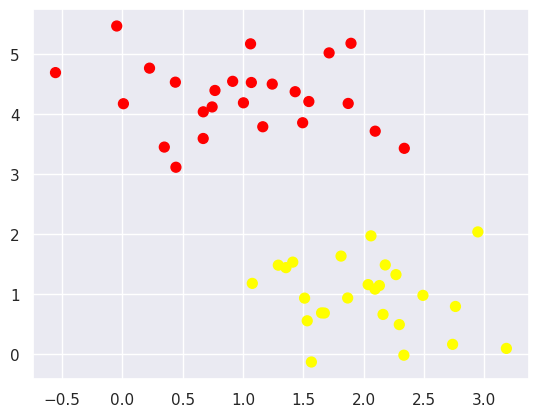

In [2]:
from sklearn.datasets import make_blobs

# Gerando dados gaussianos para clusterização
# Servirão muito bem para nosso exemplo de SVM simples
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Vamos considerar a reta a seguir como uma superfície de separação válida.

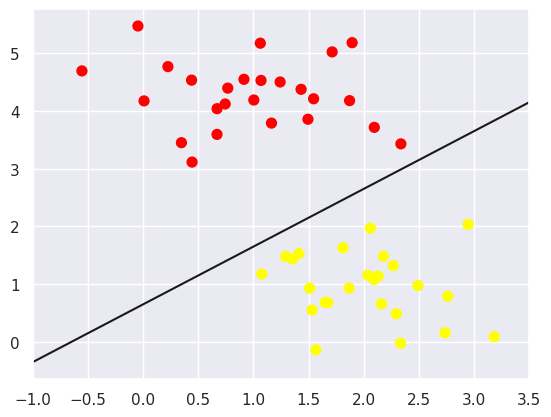

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Qualquer ponto acima da linha será classificado na classe círculo vermelho, e abaixo, será da classe círculo amarelo.

A separação de classes, é exatamente o que o SVM faz. Ele descobre uma linha/hiperplano (no espaço multidimensional que separa as classes) que melhor faça esta separação.

Mas temos vários candidatos válidos, como mostrado abaixo, que podem separar os pontos de dados. Como escolhemos a melhor linha que separa o conjunto de dados em duas classes?

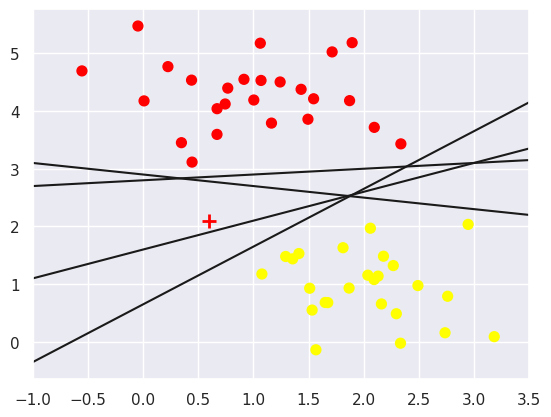

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], '+', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9), (0.1, 2.8)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Temos quatro superfícies de separação muito diferentes que, no entanto, discriminam perfeitamente essas amostras.

Dependendo da sua escolha, um novo ponto de dados (por exemplo, o marcado pelo "+" neste gráfico) receberá uma etiqueta diferente! Claramente, nossa simples intuição de "traçar uma linha entre as classes" não é suficiente.

### **Margem**

O SVM localiza o hiperplano que maximiza a margem entre os vetores de suporte das duas classes.

Hiperplano são limites de decisão que classificam o conjunto de dados enquanto maximizam a margem.

A intuição é a seguinte: em vez de simplesmente desenhar uma linha de largura zero entre as classes, podemos desenhar em torno de cada linha uma margem de alguma largura, até o ponto mais próximo de cada classe.

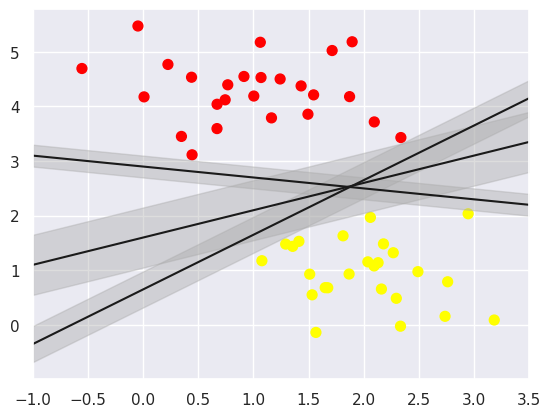

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Nos SVMs, a linha que maximiza essa margem é a que escolheremos como o modelo ideal. Logo, SVMs são um exemplo desse estimador de margem máxima.

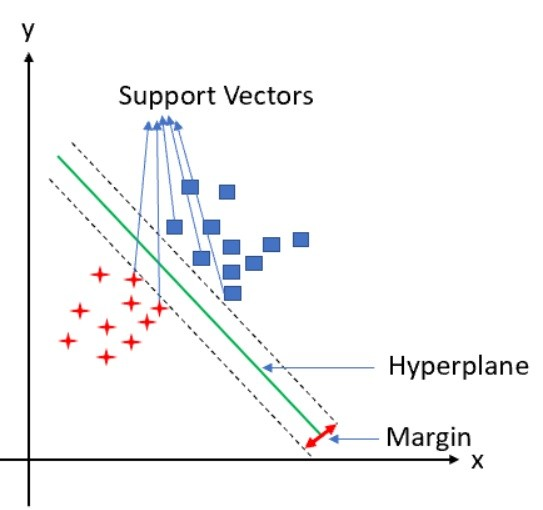

Os vetores de suporte são os pontos de dados no conjunto de dados mais próximos ao hiperplano. A remoção de vetores de suporte alterará o hiperplano que separa duas classes. Os vetores de suporte são elementos críticos do conjunto de dados, considerando que o SVM é construído sobre eles.

O modelo SVM tem dois objetivos principais, encontrar um hiperplano (linha) que separa linearmente os pontos de dados em duas classes e maximizar a margem entre vetores de suporte das duas classes.

### **Kernel (Núcleo)**

Aqui a álgebra linear desempenha um papel fundamental.

Nossos problemas estarão normalmente associados às transformações de espaços vetoriais. O algoritmo SVM é implementado na prática usando um kernel. O aprendizado do hiperplano no SVM linear é feito transformando o problema usando artifícios de álgebra linear.

O kernel no SVM é responsável por transformar os dados de entrada no formato necessário. Alguns dos núcleos usados no SVM são lineares, polinomiais e radiais (função de base, RBF). Para criar um hiperplano não linear, usamos as funções RBF e Polinomial. Para aplicações complexas, deve-se usar núcleos mais avançados para separar classes de natureza não linear. Com essa transformação, é possível obter classificadores precisos.

Seguem alguns exemplos de Kernels SVM:

#### Kernel Polinomial

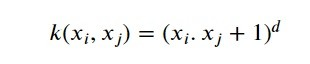

#### Kernel Gaussiano

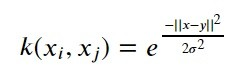

#### Kernel RBF (usado quando não há conhecimento prévio sobre os dados)

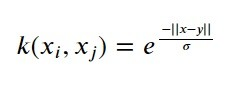

### **Regularização**

Podemos fazer a regularização ajustando o parâmetro `C` do Scikit-learn. Este é um parâmetro de penalidade que representa um erro ou qualquer forma de classificação incorreta.

Com essa classificação incorreta, pode-se entender quanto do erro é realmente aceitável. Com isso, você pode anular a compensação entre o termo não classificado e o limite da decisão.

Com um valor `C` menor, obtemos hiperplano de maior margem e com um valor `C` maior, obtemos hiperplano de menor margem.

#### Baixo valor contra contra alto valor do parâmetro C

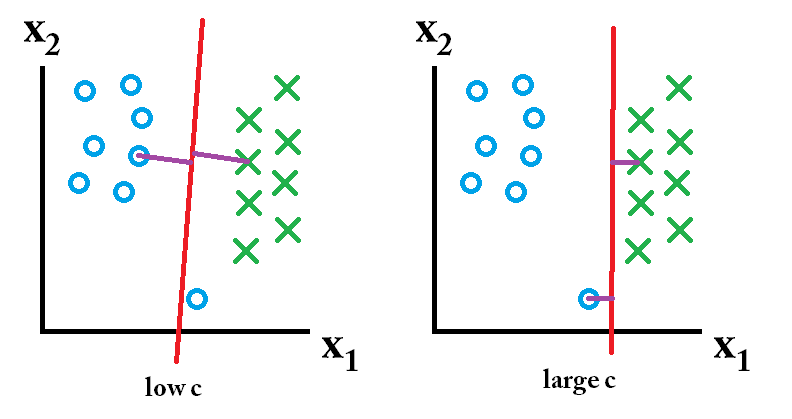


## **Criando um classificador SVM para os dados**

Usaremos o classificador SVM nesses dados. Por enquanto, usaremos um kernel linear e definiremos o parâmetro `C` para um número muito grande (parâmetro de regularização).

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E50)
model.fit(X, y)

SVC(C=1e+50, kernel='linear')

Vamos a uma função que mostra os limites de decisão do SVM.

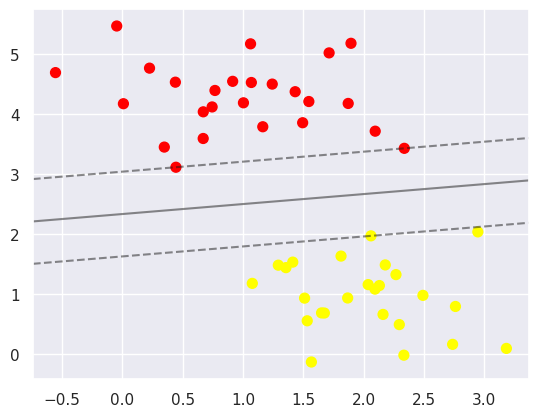

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # Plota a função de decisão para um classificador SVM em 2D
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Criando um grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plotando a superfície de decisão e as margens
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plotando os vetores de suporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Essa é a linha divisória que maximiza a margem entre os dois conjuntos de pontos. Os pontos de treinamento que tocam a margem são os elementos principais desse ajuste e conhecidos como vetores de suporte, dando nome ao algoritmo. No Scikit-Learn, a identidade desses pontos é armazenada no atributo do classificador, chamado de `support_vectors_`.

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Como já vimos, para ajustarmos o modelo apenas a posição dos vetores de suporte é importante. Quaisquer pontos mais afastados das margens não modificam o comportamento.

Tecnicamente, isso ocorre porque esses pontos não contribuem para a função de perda usada para ajustar o modelo, portanto, sua posição e quantidade não importam, desde que não ultrapassem a margem.

### **Separação do SVM quando as classes não são linearmente separáveis**

Abaixo temos exempo de dados que não são linearmente separáveis.

Não conseguimos separar as duas classes apenas com uma linha reta. Para resolver o problema, vamos trasforma-lo em um espaço dimensional mais alto para torná-lo linearmente separável.

O SVM se torna extremamente poderoso quando ele é combinado com os kernels. O papel de um Kernel no SVM é projetar nossos dados em um espaço de maior dimensão, definido por polinômios e funções de base gaussiana, e assim ajustar relações não lineares com um classificador linear.

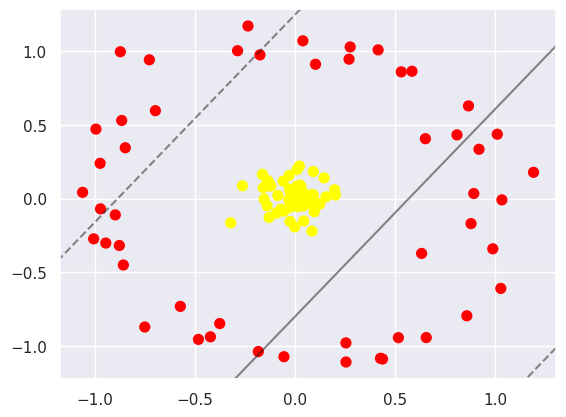

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Os dados acima não são linearmente separáveis no espaço bidimensional, pois não há linha que possa separar as duas classes neste plano `xy`. Então, o que fazer?

Podemos aplicar uma transformação e adicionar mais uma dimensão, criando um eixo `z`, ou seja, projetar os dados para uma dimensão superior de tal forma que um separador linear seja suficiente.

Por exemplo, uma projeção simples que poderíamos usar seria calcular uma função de base radial centrada no grupo intermediário, como implementado na função a seguir. Vamos visualizar essa dimensão extra de dados usando um gráfico tridimensional.

Text(0.5, 0, 'z')

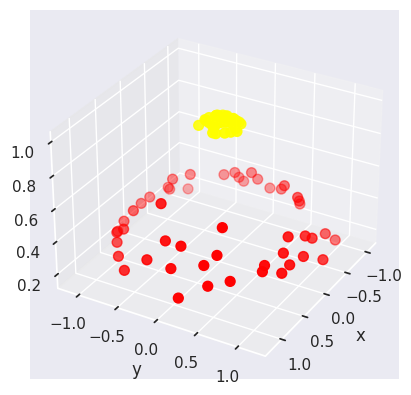

In [11]:
# Função de base radial centrada no grupo intermediário
r = np.exp(-(X ** 2).sum(1))

ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Temos condições claras de uma superfície de separação, o hiperplano agora separa as duas classes linearmente.

Aqui tivemos que escolher e ajustar cuidadosamente nossa projeção: se não tivéssemos centralizado nossa função de base radial no local certo, não teríamos visto resultados tão diretos e linearmente separáveis.

Em geral, a necessidade de fazer essa escolha é um problema: gostaríamos de encontrar, de alguma forma, automaticamente, as melhores funções básicas a serem usadas.

Uma estratégia para esse fim é calcular uma função básica centralizada em todos os pontos do conjunto de dados e deixar o algoritmo SVM filtrar os resultados. Esse tipo de transformação de função básica é conhecido como transformação do kernel, ou *Kernel Trick*.

### ***Kernel Trick***

São funções que pegam um espaço de entrada dimensional baixo e o transforma em um espaço dimensional superior, isto é, ele converte problema não separável em problema separável. Essas funções são conhecidas como *kernels*.

Já vimos que no Scikit-Learn, podemos aplicar SVM simplesmente alterando nosso kernel linear para um kernel RBF (função de base radial).

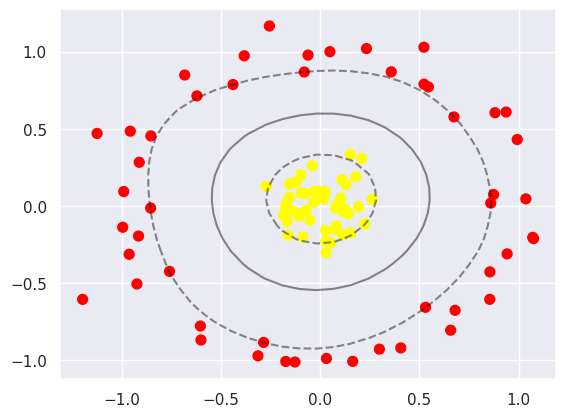

In [12]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### **Suavizando Margens**

Até agora, nossa discussão se concentrou em conjuntos de dados muito limpos, nos quais existe um limite de decisão claro. Mas e se os dados tiverem alguma sobreposição?

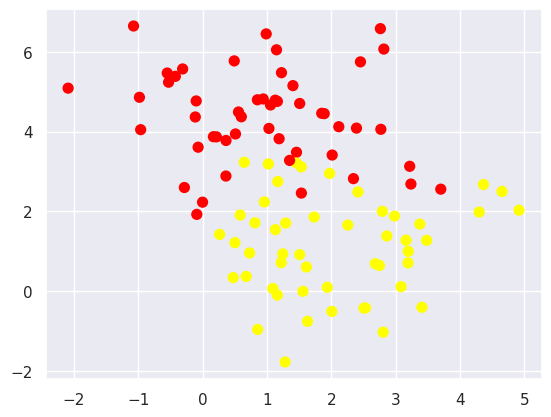

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Nesse caso, a implementação do SVM possui um fator de correção que "suaviza" a margem: ou seja, permite que alguns dos pontos entrem na margem se isso permitir um melhor ajuste.

A dureza da margem (*hardness*) é controlada por um parâmetro de ajuste que já conhecemos, o parâmetro `C`.

Para `C` muito grande, a margem é mais rígida e os pontos não podem estar nela. Para `C` menor, a margem é menos restritiva e pode crescer, para abranger alguns pontos.

O gráfico mostrado abaixo fornece uma impressão visual de como o parâmetro afeta o ajuste final, através do suavização da margem.

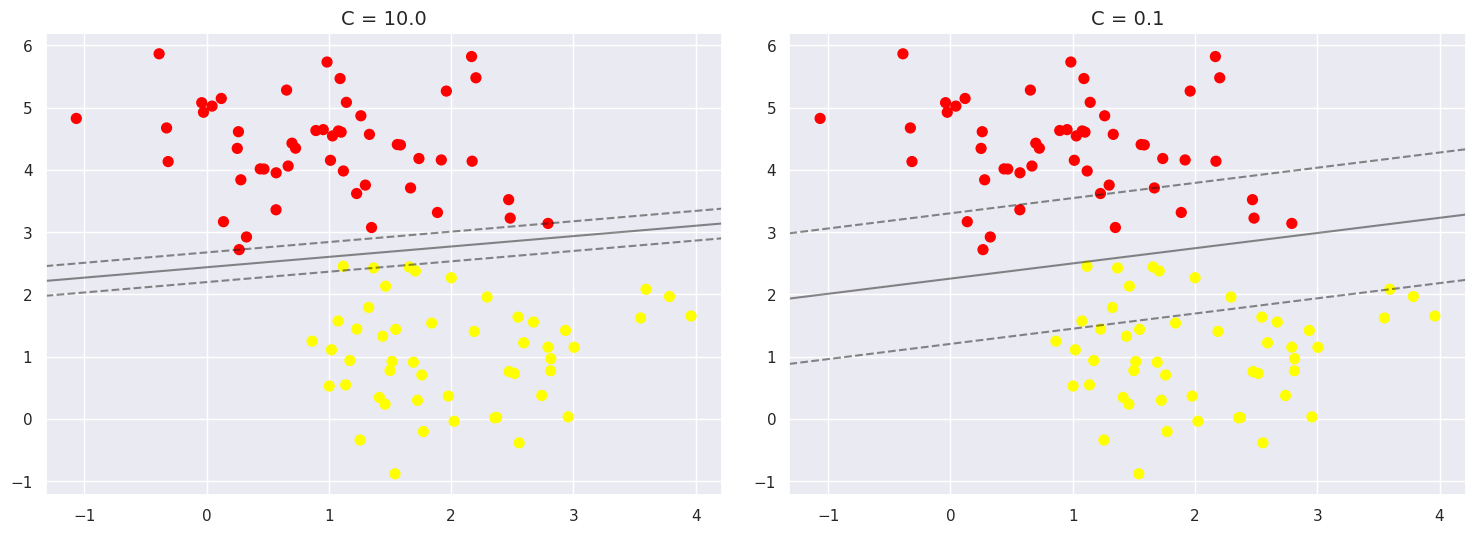

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');

    axi.set_title('C = {0:.1f}'.format(C), size=14)